In [ ]:
import glob
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from collections import defaultdict

In [19]:
sns.set_theme(style="whitegrid")

In [2]:
def parse_stats_file(stats_path):
    results = defaultdict(list)
    with open(stats_path, 'r') as stream:
        for line in stream:
            if line.startswith("#= Summary for dataset:"):
                datapath = line.split()[-1]
                dataset = datapath.split('/')[-2]
            if "level" in line:
                level, stats = line.split("level:")
                results["dataset"].append(dataset)
                results["level"].append(level.strip())
                results["sensitivity"].append(float(stats.split()[0]))
                results["precision"].append(float(stats.split()[2]))
    return pd.DataFrame.from_dict(results)

In [3]:
accession_translator = {
    "GCF_009017415.1" : "Aspergillus flavus (Ascomycota)",
    "GCF_000143535.2" : "Botrytis cinerea (Ascomycota)",
    "GCF_033473495.1" : "Cercospora beticola (Ascomycota)",
    "GCF_000240135.3" : "Fusarium graminearum (Ascomycota)",
    "GCF_000146045.2" : "Saccharomyces cerevisiae (Ascomycota)",
    "GCF_000835755.1" : "Cryptococcus tetragattii (Basidiomycota)",
    "GCF_021901695.1" : "Puccinia striiformis (Basidiomycota)",
    "GCA_964035595.1" : "Somion occarium (Basidiomycota)",
    "GCF_026210795.1" : "Rhizophagus irregularis (Mucoromycota)",
}

In [10]:
stats_paths = glob.glob("outputs/gffcompare/*/gffcmp.stats")
dfs = []
for path in stats_paths:
    accession = path.split('/')[2]
    stats_df = parse_stats_file(path)
    stats_df["species"] = accession_translator[accession]
    dfs.append(stats_df)
all_stats = pd.concat(dfs)
all_stats["species"] = pd.Categorical(all_stats["species"], accession_translator.values())

In [11]:
all_stats = all_stats[all_stats["dataset"] != "augustus"]

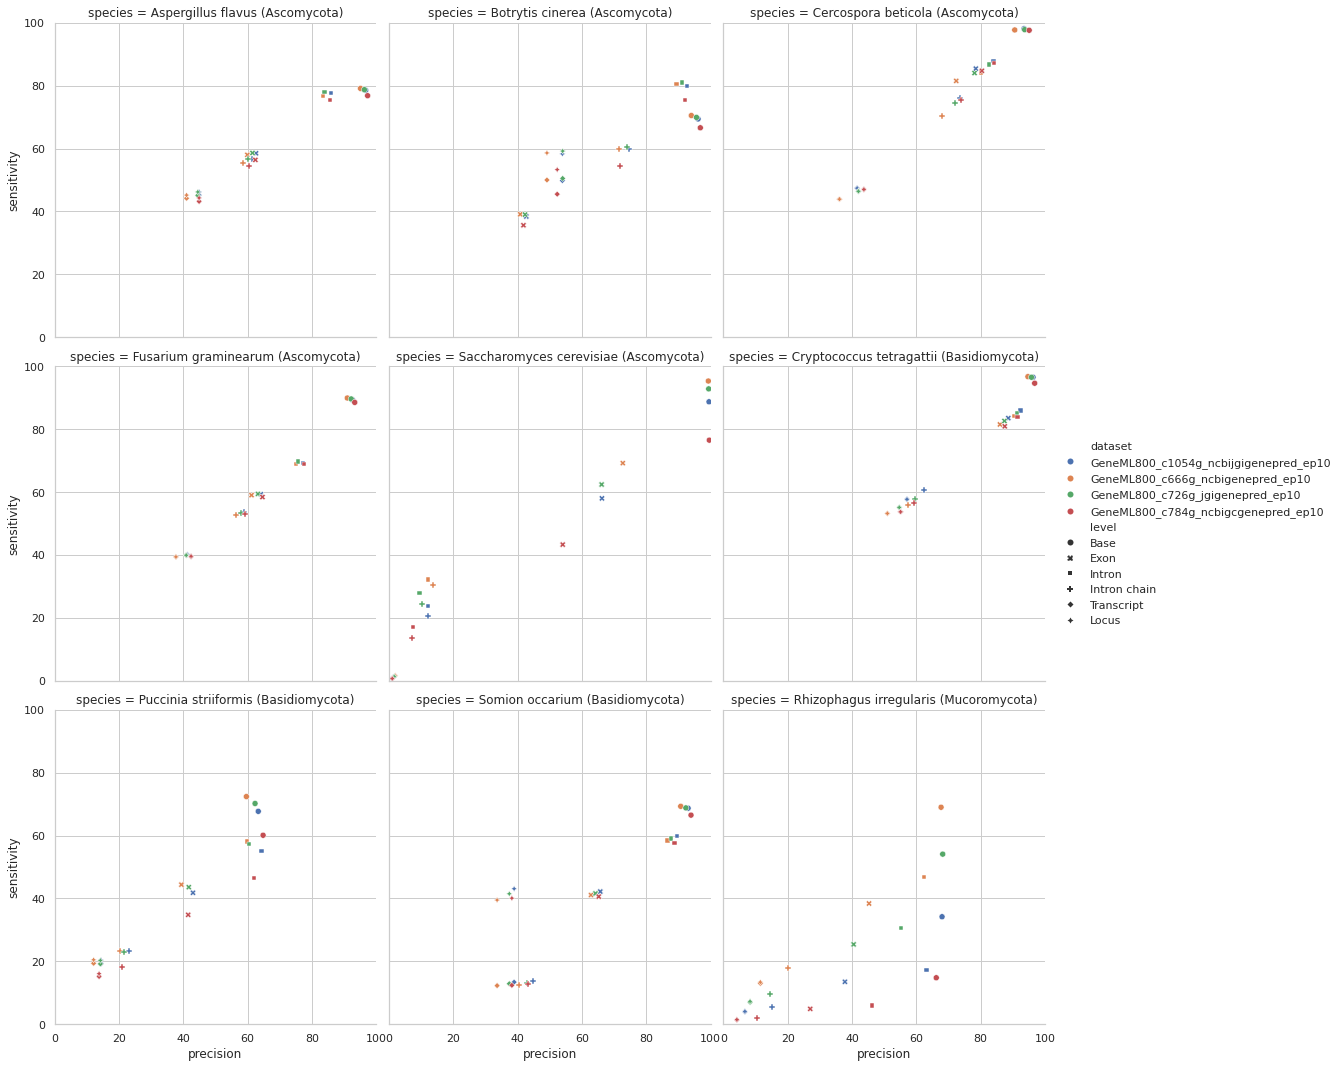

In [24]:
plot = sns.relplot(data=all_stats, x="precision", y="sensitivity", col="species", col_wrap=3, hue="dataset", style="level")
plot.set(xlim=(0, 100), ylim=(0, 100))
plt.savefig("gffcompare_plot.svg")

In [6]:
stats_paths = glob.glob("mibig_stats/*.stats")
dfs = []
for path in stats_paths:
    accession = os.path.splitext(os.path.basename(path))[0]
    stats_df = parse_stats_file(path)
    stats_df["accession"] = accession
    dfs.append(stats_df)
mibig_stats = pd.concat(dfs)

In [11]:
mibig_stats.sort_values("precision")

,dataset,level,sensitivity,precision,accession
3,mibig_outputs/BGC0001563.gff3,Locus,0.0,0.0,BGC0001563
5,mibig_outputs/BGC0001275.gff3,Locus,0.0,0.0,BGC0001275
5,mibig_outputs/BGC0001240.gff3,Locus,0.0,0.0,BGC0001240
3,mibig_outputs/BGC0001258.gff3,Intron chain,0.0,0.0,BGC0001258
2,mibig_outputs/BGC0002171.gff3,Transcript,0.0,0.0,BGC0002171
...,...,...,...,...,...
2,mibig_outputs/BGC0002211.gff3,Intron,100.0,100.0,BGC0002211
1,mibig_outputs/BGC0002211.gff3,Exon,100.0,100.0,BGC0002211
2,mibig_outputs/BGC0001886.gff3,Intron,81.8,100.0,BGC0001886
0,mibig_outputs/BGC0000076.gff3,Base,99.3,100.0,BGC0000076


/home/lisvad/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/lisvad/.local/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


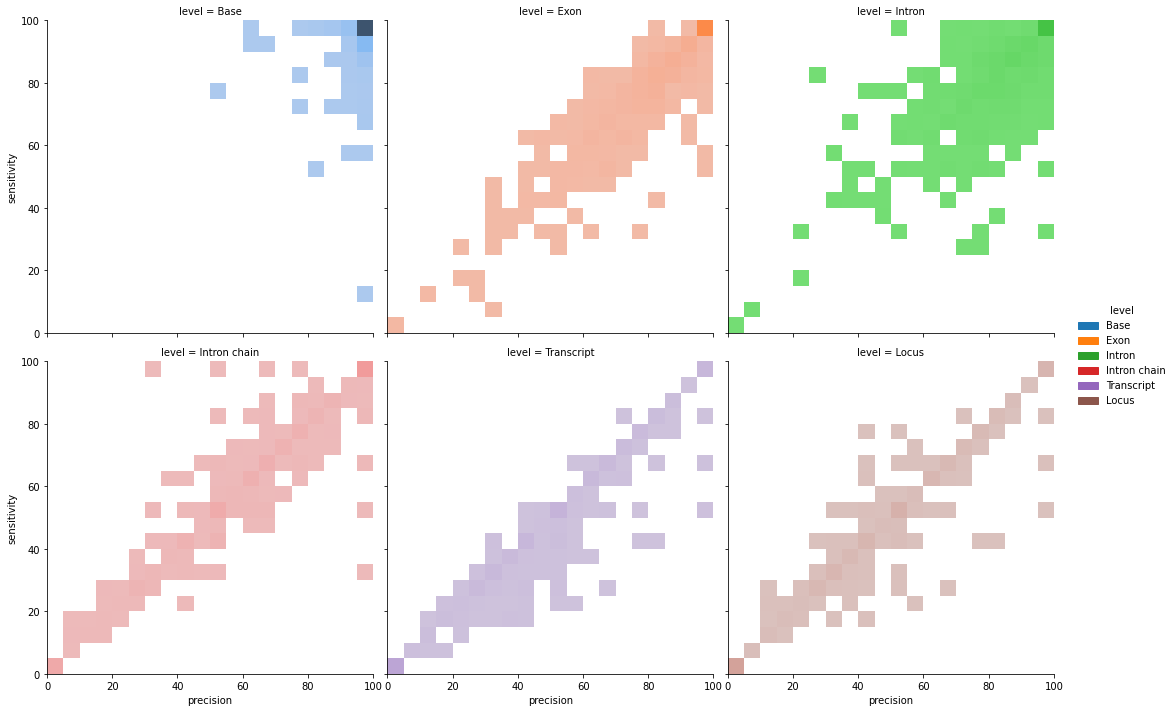

In [24]:
plot = sns.displot(data=mibig_stats, x="precision", y="sensitivity", col="level", col_wrap=3, hue="level", bins=20)
plot.set(xlim=(0, 100), ylim=(0, 100))